# 아동학대 현황
- 한 사회가 아이들을 다루는 방식보다 더 그 사회의 영혼을 정확하게 보여주는 것은 없다 -넬슨 만델라-
- 아동학대 신고 관련 자료 - 학대행위자와 신고당사자, 재학대, 그리고 그에 따른 조치 현황

In [2]:
import pandas as pd
import pymysql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 쿼리 실행

In [53]:

# conn = pymysql.connect(host = 'localhost', user='root', password='1161', db='singo', charset='utf8')
# cur = conn.cursor()
def makequery(query):
    conn = pymysql.connect(host = 'localhost', user='root', password='1161', db='singo', charset='utf8')
    cur = conn.cursor()
    cur.execute(query) # 쿼리 실행
    col = []  # 컬럼 추출
    for val in (cur.description):
        col.append(val[0])
    rows = cur.fetchall() # 모든 데이터를 가져옴
    df = pd.DataFrame(rows, columns = col)
    cur.close()
    conn.close()
    return df
query1 = 'select 유형별1, 유형별2, 2018총계,2019총계, 2020총계 from 신고자_유형 where 유형별2 != "소계";'
query2 = 'select * from 아동학대처벌법_조치사례;'
# query3 = 'select * from 재학대_사례_학대행위자와_피해아동과의_관계;'
query4 = 'select `원가정보호 원가정보호 유지`, `가정복귀 소계`, `분리조치 소계`, `기타 소계`, `사망` from 피해아동_상황;'
query5 = '''select 학.연도, 학.부모, 학.친인척, 학.대리양육자, 학.기타, 재.`부모 소계` as 재_부모, 재.`친인척 소계` as 재_친인척, 재.`대리양육자 소계` as 재_대리, 재.`기타 소계` as 재_기타 from 학대_사례_학대행위자와_피해아동과의_관계 학
inner join 
재학대_사례_학대행위자와_피해아동과의_관계 재
on 학.연도  = 재.연도;'''

df = makequery(query1)
df_jochi = makequery(query2)
df_boho = makequery(query4)

df_rel = makequery(query5)
df_rel

,연도,부모,친인척,대리양육자,기타,재_부모,재_친인척,재_대리,재_기타
0,2018,29228,1695,5488,892,2427,71,38,6
1,2019,35240,1957,7489,1372,3244,100,72,15
2,2020,39233,2471,4131,1215,3492,103,65,8


In [4]:
df.rename(columns= {0: '유형별1', 1:'유형별2', 2:'2018총계', 3: '2019총계', 4:'2020총계'}, inplace=True)

In [5]:
df_singo = df.groupby('유형별1').sum()
df_singo

,2018총계,2019총계,2020총계
유형별1,,,
비신고의무자,24381.0,29544.0,27956
신고의무자,9151.0,8836.0,10973


In [124]:
def color_dist(member):
    if member == '신고의무자':
        return 'tomato'
    else: return 'skyblue'

### 신고의무자와 비신고의무자 차이 비교

### Notation
- 신고의무자 : 아동학대 신고 의무를 가진 자로 신고의무자에는 초·중·고교 직원, 의료인, 아동복지시설
종사자, 장애인복지시설 종사자, 보육교직원, 유치원교직원·강사, 학원 및 교습소 종사자,
소방구급대원, 성매매 피해지원시설 및 상담소 종사자, 한부모가족복지상담소 및 복지시설
종사자, 아동권리보장원·가정위탁지원센종사자, 사회복지전담공무원, 아동복지전담공무원,
아동보호전문기관장과 종사자등 25개 직군이 포함됨(__아동학대처벌법 제10조__)

- 비신고의무자 : 신고의무자를 제외한 모든 자 (아동본인, 부모, 형제자매, 이웃, 친구, 아동보호전문기관종사자 등)  -- (참조 0)

- 신고의무자의 중요성 : 학대가해자의 대부분은 '부모'이기 때문에 잘 드러나지 않는 아동학대 범죄 특성상 아동을 접할 기회가 많은 이들에게 신고의무를 부여, 문제는 아동을 접할 기회가 많은 신고의무자가 학대를 막는데에 큰 기여, 신고의무자의 신고정확도는 76.1%, 비신고의무자의 정확도는 68%   

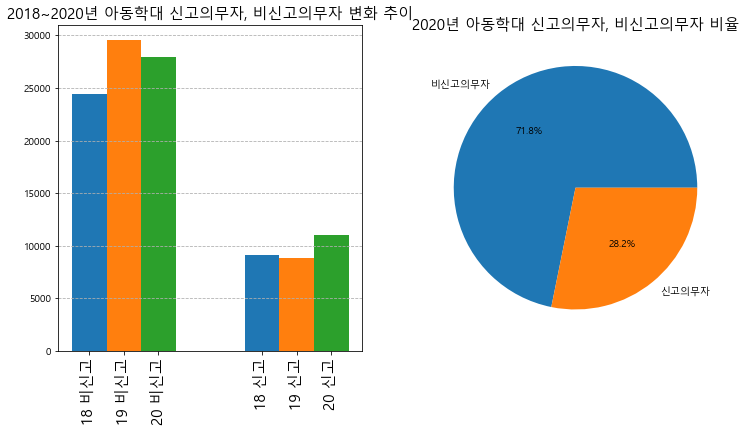

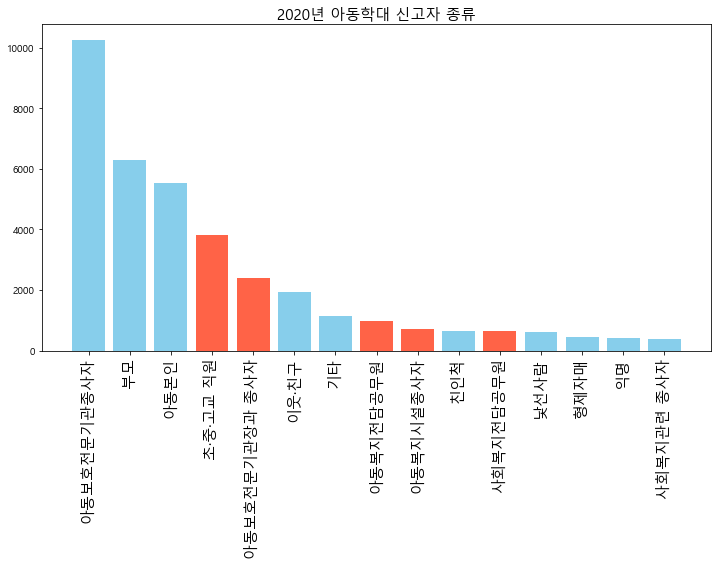

In [156]:
from cProfile import label
import platform
%matplotlib inline
# 그래프 한글 설정
if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')
fig, axes = plt.subplots(1,2, figsize=(12,6))
# 그래프1
plt.subplot(1,2,1)
plt.title('2018~2020년 아동학대 신고의무자, 비신고의무자 변화 추이', size=15)
plt.bar([0,1],df_singo['2018총계'], width=0.2)
plt.bar([0.2,1.2],df_singo['2019총계'], width=0.2)
plt.bar([0.4,1.4],df_singo['2020총계'], width=0.2)
plt.xticks([0, 0.2, 0.4, 1, 1.2, 1.4], ['18 비신고', '19 비신고', '20 비신고', '18 신고', '19 신고', '20 신고'] , rotation = 90, size=15)
plt.grid(axis='y', linestyle='--')
# 그래프2
plt.subplot(1,2,2)
plt.title('2020년 아동학대 신고의무자, 비신고의무자 비율', size=15)
plt.pie(df_singo['2020총계'], autopct='%.1f%%', labels=['비신고의무자', '신고의무자'])
plt.show()

# 그래프3
plt.rcParams['figure.figsize'] = (12,6)
val = df.set_index('유형별2').sort_values('2020총계', ascending=False).iloc[:15,3]
color = df.set_index('유형별2').sort_values('2020총계', ascending=False)['유형별1'].apply(lambda z: color_dist(z))
plt.bar(range(len(val)), val, color = color)
plt.xticks(range(len(val)), val.index, rotation= 90, size= 15)
plt.title('2020년 아동학대 신고자 종류', size=15)
plt.show()

### 그래프 설명 
- 비신고의무자 >> 신고의무자 차이, 턱없이 낮은 신고의무자의 신고율
    - 원인 : 보복 우려, 신고시 불이익 걱정 ---- (출처: 2,5,6)
- 연도별로 살펴봐도 차이가 줄어들지 않음
- 신고의무자의 신고율: 미국(65.7%), 호주(73%), 일본(68%) 등 타국보다 저조   ---(출처: 1)
- 카테고리 별로 살펴봐도 <span style='color:skyblue'> 비신고의무자(10개) </span> >> <span style='color:tomato'> 신고의무자(5개) </span>


In [60]:
df_jochi

,연도,아동학대사례 (건),아동학대처벌법 조치사례 (건),아동학대처벌법 조치사례 비율 (%)
0,2018,24604,2290,9.3
1,2019,30045,2705,9.0
2,2020,30905,3635,11.8


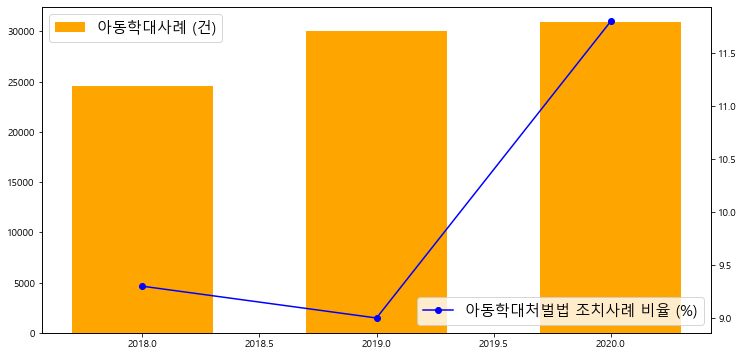

In [130]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (12,6)
ax.bar([2018,2019,2020], df_jochi['아동학대사례 (건)'], color='orange', width =0.6)
ax.legend(labels = ['아동학대사례 (건)'], loc='upper left', fontsize='15')
ax2 = ax.twinx()
ax2.plot([2018,2019,2020], df_jochi['아동학대처벌법 조치사례 비율 (%)'], color='blue', marker='o')
ax2.legend(labels = ['아동학대처벌법 조치사례 비율 (%)'], loc='lower right',fontsize='15')


### 중간 분석
- 전체 학대사례 ↑ , but 아동학대처벌법 조치 비율은 12프로 이하로 미비
- 60프로 이상 보호조치

## 재학대

[]

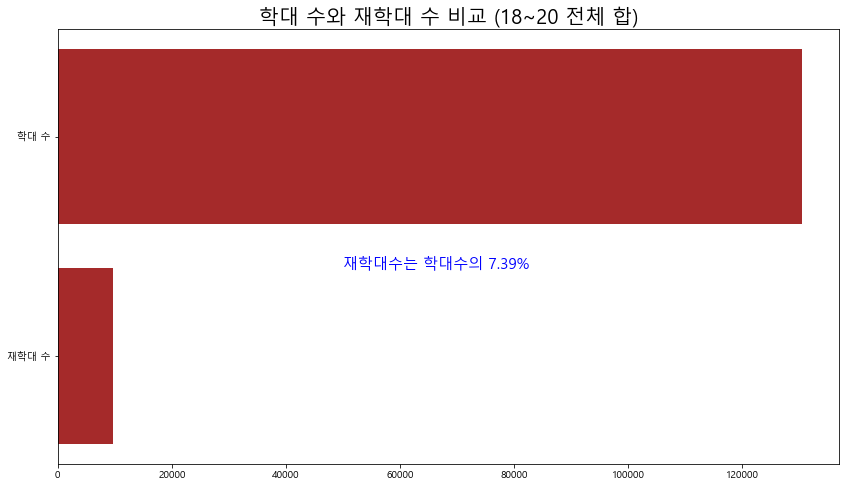

In [153]:
somelist = [df_rel.iloc[:,5:].sum().sum(),df_rel.iloc[:,1:5].sum().sum()  ]
plt.rcParams['figure.figsize'] = (14,8)
plt.barh(['재학대 수', '학대 수'], somelist , color='brown') 
plt.title('학대 수와 재학대 수 비교 (18~20 전체 합)', size=20)
plt.text(50000, 0.4,f'재학대수는 학대수의 {round(100 * somelist[0] /somelist[1],2)}%', size=15, color='blue')
plt.plot()

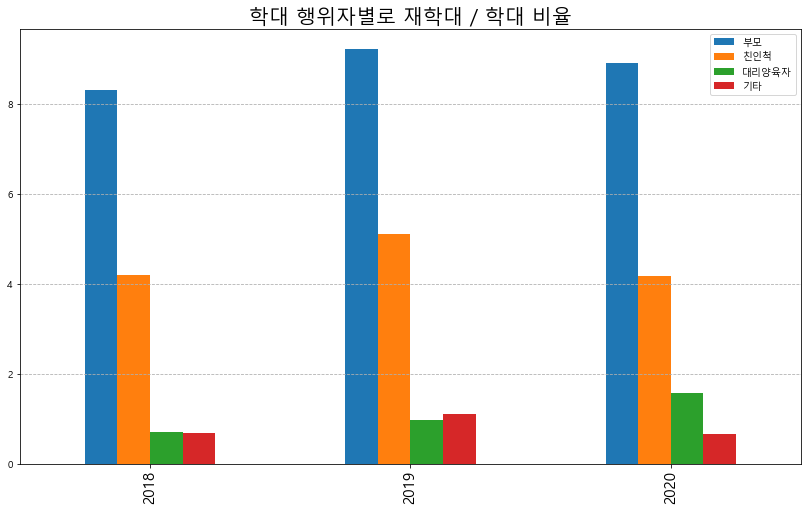

In [47]:
# 학대행위자별로 재학대 / 학대 비율
dfr = df_rel.iloc[:,5:].copy().rename(columns={'재_부모': '부모', '재_친인척':'친인척', '재_대리':'대리양육자', '재_기타': '기타'})
compare = 100 * dfr / df_rel.iloc[:,1:5].copy() 
plt.rcParams['figure.figsize'] = (14,8)
compare.plot(kind='bar' )
plt.title('학대 행위자별로 재학대 / 학대 비율', size=20)
plt.xticks([0,1,2], [2018, 2019, 2020], size=15)
plt.grid(axis='y', linestyle='--')

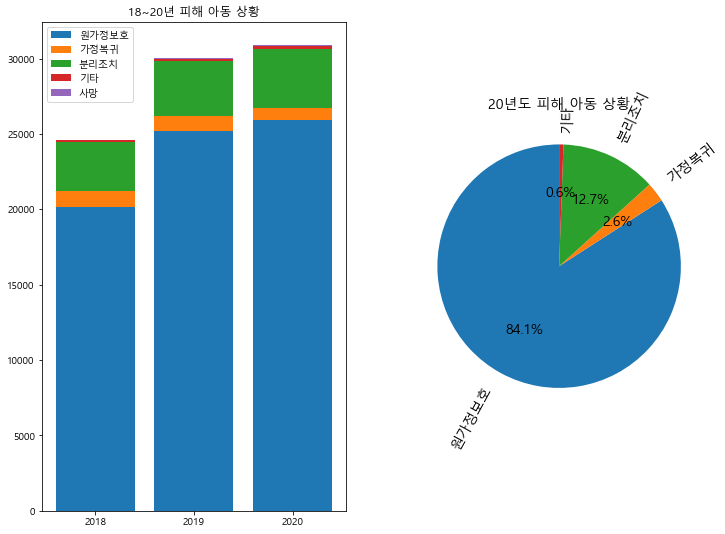

In [155]:
df_boho
fig, axes = plt.subplots(1,2, figsize=(12,9))
plt.subplot(1,2,1)
sum = pd.Series((0,0,0))
for col in df_boho.columns:
    plt.bar([2018,2019,2020], df_boho[col],bottom=sum)
    sum += df_boho[col]

plt.title('18~20년 피해 아동 상황')
plt.legend(['원가정보호','가정복귀','분리조치','기타', '사망'])
plt.xticks([2018,2019,2020], [2018,2019,2020])

plt.subplot(1,2,2)
plt.pie(df_boho.iloc[2,:4], autopct='%.1f%%',  startangle=90, labels= ['원가정보호', '가정복귀', '분리조치', '기타'], rotatelabels=True, textprops={'size': 14})
plt.title('20년도 피해 아동 상황', size=14)
plt.show()

#### 피해아동 상황
- Notation
    - __원가정보호__: 피해아동을 실제적으로 양육하고 있는 주양육자에 의해 계속적으로 보호받고 있는 경우
    - __분리조치__ : 아동을 실제적으로 양육하고 있는 주양육자로부터 분리하여 보호하는 경우
    - 기타: 소년원 입소, 행방불명 등으로 인해 아동의 신원확인이 불가한 경우
    
- 분석: 높은 원가정보호, 학대행위자 카테고리의 __부모__ 에게서 가장 높은 재학대
    - 아동학대 건수가 연도별로 ↑  $\Rightarrow$ 조치되는 케이스 ↑
    - 처벌조치 12%이하 + 원가정보호 80%이상 + 가정 87% + 부모 재학대 비율 상대적 ↑  
     $\Rightarrow$ 조치가 제대로 이루어지지 않을 시 사태만 악화 + 재학대 가능성 ↑

 #### 정보
 - <한국보건사회연구원>의 보고서에 따르면, 폭력에 노출되는 시간이 많으면 그 아이에게는 폭력적인 환경에서 살아남을 수 있는 유일한 방법은 '폭력'이라고 각인되기에 폭력적인 성향을 가질 확률이 높아진다. --- (참조: 7, 8)

# <span style='color:Blue'> 결론 </span>
1. __아동학대__ 의 문제는 현재진행형이며 계속 증가하는 양상
2. 적은 __아동학대 신고율__ , 걸림돌은 __신고자 보복 위험__ 
3. __재학대__ 비율도 높은 편으로 아동학대범에 대해 __체계적인 조치__ 가 필요
4. 체계적인 조치가 없다면 __폭력의 대물림__ 이 발생하여 다음 생애에도 아동폭력은 계속될 것

출처:   
책 
0. 보건복지부 2020 아동학대 주요통계
https://www.data.go.kr/data/15089720/fileData.do

데이터
https://kosis.kr/search/search.do?query=%ED%94%BC%ED%95%B4%EC%95%84%EB%8F%99

기사
1. 2020.08.26 [아동학대 7년의 기록]④ 눈감은 신고의무자…아동보호전문기관은 태부족  
https://news.kbs.co.kr/news/view.do?ncd=4525557
2. 2020.06.14 저조한 아동학대 신고율...걸림돌은 "가해자 보복 우려"
https://news.mt.co.kr/mtview.php?no=2020061409541599915
3. 2022.04.13 "한국 아동학대, 세계에 없는 굉장히 놀랍고 특이한 경우"
http://news.kmib.co.kr/article/view.asp?arcid=0016970311&code=61121111&sid1=s
4. 2020.08.25 '원가정 복귀' 지침 없앤다고 아동학대가 없어질까요
https://www.seoul.co.kr/news/newsView.php?id=20200825500135
5. 2022.07.15 거듭된 아동학대 신고자 신원 노출에 경찰 신고자 보호조치 강화
https://www.khan.co.kr/national/national-general/article/202207151435001
6. 2021.01.18 아동학대 신고 의무자들 왜 주저하나..."신원 노출될까봐, 상황 더 악화될까봐..." 
https://www.yeongnam.com/web/view.php?key=20210116010001932
7. 2020.10.07 폭력은 왜 대물림될까
https://brunch.co.kr/@nolja/7

논문
8. 생애주기별 학대 경험 연구 - 아동기 학대․폭력의 중복적 경험과 정책적 대응
http://repository.kihasa.re.kr/handle/201002/32639